In [1]:
import matplotlib.pyplot as plt
import mpmath as mp
mp.dps = 120; mp.pretty = True

from neutrinos import NuOscObservables
Nudata = NuOscObservables

In [2]:
from formfactors_functions import formfactors_neutrino_sum


      ____  __________  __                    
     / __ \/ ____/ __ \/ /   ____  ____  ____ 
    / / / / /   / / / / /   / __ \/ __ \/ __ \
   / /_/ / /___/ /_/ / /___/ /_/ / /_/ / /_/ /
   \___\_\____/_____/_____/\____/\____/ .___/ 
                                     /_/      
   ___git___: 2.1.0 | __authors__: S.C., K.E., G.Z.

--- Calculating H10 Interactions ---

--- Calculating Z1 Interactions ---

--- Defining Lepton Interactions with charged fields ---

Refactored script execution finished.


INFO: --- Creating Diagram: triangle_ni_GLp_GLm (FSS) ---
INFO: Vertex 1 ({{H_1^0}}-{{G_L^+}}-{{G_L^-}}) coupling found: -\alpha_{13}**2*k_1/\rho_1 + 4*\lambda_{12}*k_1
INFO: Vertex 2 ({{G_L^+}}-\overline{n}[i]-\ell[b]) coupling found: L=-sqrt(2)*T_{RL}[i, b]/k_1, R=sqrt(2)*conjugate(Q_L[b, i])*m_\ell[b]/k_1
INFO: Vertex 3 ({{G_L^-}}-\overline{\ell}[a]-n[i]) coupling found: L=sqrt(2)*Q_L[a, i]*m_\ell[a]/k_1, R=-sqrt(2)*conjugate(T_{RL}[i, a])/k_1
INFO: Mass List for TriangleFSS: [m_{H_1^0}, m_\ell[a], m_\ell[b], mn[i], m_{W_1}, m_{W_1}]
INFO: Successfully created triangle_ni_GLp_GLm (FSS)
INFO: --- Creating Diagram: triangle_ni_GRp_GRm (FSS) ---
INFO: Vertex 1 ({{H_1^0}}-{{G_R^+}}-{{G_R^-}}) coupling found: -\alpha_{13}**2*k_1**3/(\rho_1*v_R**2) + 4*\lambda_{12}*k_1**3/v_R**2
INFO: Vertex 2 ({{G_R^+}}-\overline{n}[i]-\ell[b]) coupling found: L=-sqrt(2)*conjugate(Q_R[b, i])*m_\ell[b]/v_R, R=sqrt(2)*conjugate(J[b, i])/v_R
INFO: Vertex 3 ({{G_R^-}}-\overline{\ell}[a]-n[i]) coupling found:

28 diagrams created and stored in all_diagrams dictionary.


In [3]:
import pandas as pd

path_data_potential = "/home/moises/blssm-bcastor/experiments_paper/dlrsm/mcmcmh_good_2.csv"
path_data_perturvativity_1000 = "/home/moises/LRSM-with-Spheno/sympy_calculations/LFV decays DLRSM/data/YRi_bound_data_vR_log_1000.csv"
path_data_perturvativity_5000 = "/home/moises/LRSM-with-Spheno/sympy_calculations/LFV decays DLRSM/data/YRi_bound_data_vR_log_5000.csv"
path_data_perturvativity_10000 = "/home/moises/LRSM-with-Spheno/sympy_calculations/LFV decays DLRSM/data/YRi_bound_data_vR_log_10000.csv"
path_data_perturvativity_100000 = "/home/moises/LRSM-with-Spheno/sympy_calculations/LFV decays DLRSM/data/YRi_bound_data_vR_log_100000.csv"
# Load data
data_scan_potential = -pd.read_csv(path_data_potential)
data_scan_perturvativity_1000 = pd.read_csv(path_data_perturvativity_1000)
data_scan_perturvativity_5000 = pd.read_csv(path_data_perturvativity_5000)
data_scan_perturvativity_10000 = pd.read_csv(path_data_perturvativity_10000)
data_scan_perturvativity_100000 = pd.read_csv(path_data_perturvativity_100000)

INFO: NumExpr defaulting to 8 threads.


In [4]:
data_scan_potential

,lam1input,lam2input,lam3input,lam4input,lam5input,lam6input,rho1input,rho2input,alpha1input,alpha2input,alpha3input,mH1,mH2,mH3,mH4
0,7.496134,4.526210,4.179526,0.378876,0.170946,8.397687,0.588648,7.630948,2.889777,3.910293,2.398283,-129.980279,-4489.84718,-5556.36734,-8981.68396
1,6.865712,5.533729,4.130740,0.511121,0.689071,8.418464,0.436771,4.575213,3.385398,3.615946,1.241002,-129.799984,-4829.60984,-5559.24089,-6802.27051
2,6.647851,3.388400,3.446311,1.021559,0.267674,9.570827,0.664184,4.176396,3.545507,4.690507,1.582649,-126.916073,-5866.00368,-5966.60254,-6330.48045
3,8.171471,2.898346,3.204701,1.347504,1.683628,8.083704,0.547375,4.084540,2.464819,6.282838,2.428851,-123.624547,-5356.83377,-6113.29508,-7026.26513
4,7.496134,4.526210,4.179526,0.378876,0.170946,8.397687,0.588648,7.630948,2.889777,3.910293,2.398283,-129.980279,-4489.84718,-5556.36734,-8981.68396
5,6.865712,5.533729,4.130740,0.511121,0.689071,8.418464,0.436771,4.575213,3.385398,3.615946,1.241002,-129.799984,-4829.60984,-5559.24089,-6802.27051
6,6.647851,3.388400,3.446311,1.021559,0.267674,9.570827,0.664184,4.176396,3.545507,4.690507,1.582649,-126.916073,-5866.00368,-5966.60254,-6330.48045
7,8.171471,2.898346,3.204701,1.347504,1.683628,8.083704,0.547375,4.084540,2.464819,6.282838,2.428851,-123.624547,-5356.83377,-6113.29508,-7026.26513


In [5]:
data_scan_perturvativity_100000

,Mn_i_minus,muii
0,6097.012020,0.000746
1,5507.270361,0.566985
2,5605.812912,0.009847
3,6544.088717,0.000060
4,189755.681161,0.000060
...,...,...
1666,21199.279658,0.019265
1667,10074.036892,0.606838
1668,15265.707822,0.000022
1669,38888.550937,0.000019


In [6]:
mp.mpf(data_scan_potential['alpha1input'][6]), data_scan_potential['alpha1input'][6]

(mpf('3.5455066145338652'), np.float64(3.545506614533865))

In [7]:
from parameters_functions import create_mn_values, select_single_value

In [8]:
# Numeric benchmark
k1_val = mp.mpf('246')
vR_val = mp.mpf('1000')
mW1_val = mp.mpf('80.3692')
#epsilon_val = k1_val/vR_val
mW2_squared_val = (mW1_val**2/k1_val**2)*(k1_val**2 + vR_val**2)
mW2_val = mp.sqrt(mW2_squared_val)


rho1_val = mp.mpf(data_scan_potential['rho1input'][6])
alpha1_val = mp.mpf(data_scan_potential['alpha1input'][6])
alpha2_val = mp.mpf(data_scan_potential['alpha2input'][6])
alpha3_val = mp.mpf(data_scan_potential['alpha3input'][6])
lambda1_val = mp.mpf(data_scan_potential['lam1input'][6])
lambda2_val = mp.mpf(data_scan_potential['lam2input'][6])
lambda3_val = mp.mpf(data_scan_potential['lam3input'][6])
alpha13_val = alpha1_val + alpha3_val
alpha12_val = alpha1_val + alpha2_val
alpha23_val = alpha2_val - alpha3_val # alpha2 - alpha3 > 0
lamb12_val = lambda1_val + lambda2_val
mHR_squared_val = (alpha23_val)*(k1_val**2 + vR_val**2)
mHR_val = mp.sqrt(mHR_squared_val)
mH10_val = mp.mpf(data_scan_potential['mH1'][6])

d21 = mp.mpf(str(Nudata.squareDm21.central))*mp.mpf('1e-18')# factor to convert eV^2 to GeV^2
d31 = mp.mpf(str(Nudata.squareDm31.central))*mp.mpf('1e-18')
mn1_val = mp.mpf('1e-12')  #GeV 
mn2_val = mp.sqrt(mn1_val**2 + d21)
mn3_val = mp.sqrt(mn1_val**2 + d31)

mni_vals = [
    mn1_val, mn2_val, mn3_val
] + create_mn_values(data_scan_perturvativity_1000)
me_val = mp.mpf('0.00051')
mmu_val = mp.mpf('0.105')
mtau_val = mp.mpf('1.776')
ml_vals = [
    me_val,
    mmu_val,
    mtau_val
]

In [86]:
print(mHR_val, ', ', alpha23_val)

1815.4704687718 ,  3.107857894631


In [9]:
ff = formfactors_neutrino_sum(
    mni_vals, ml_vals, rho1_val, alpha13_val, alpha12_val,
    alpha23_val, lamb12_val, idx_a=0, idx_b=2, k1_val=k1_val,
    vR_val=vR_val, mHR_val=mHR_val, verbose=False
)

ALsum = 0
ARsum = 0
for interaction, formfactor in ff.items():
    ffL = formfactor['AL']
    ffR = formfactor['AR']
    print('Diagram: ', interaction)
    print(f'AL = {ffL}')
    print(f'AR = {ffR}')
    ALsum += ffL
    ARsum += ffR

print(ALsum)
print(ARsum)

Diagram:  ni_GL
AL = (0.0 + 7.82409039907315e-35j)
AR = (0.0 - 2.46519032881566e-32j)
Diagram:  GL_ni
AL = (0.0 - 9.62964972193618e-35j)
AR = (0.0 - 7.39557098644699e-32j)
Diagram:  ni_GR
AL = (0.0 + 0.0j)
AR = (0.0 + 0.0j)
Diagram:  GR_ni
AL = (0.0 + 0.0j)
AR = (0.0 + 0.0j)
Diagram:  ni_HR
AL = (0.0 + 2.01948391736579e-27j)
AR = (0.0 + 6.61744490042422e-24j)
Diagram:  HR_ni
AL = (0.0 - 1.61558713389263e-27j)
AR = (0.0 - 8.27180612553028e-24j)
Diagram:  ni_W1
AL = (0.0 + 1.4475660719678e-24j)
AR = (0.0 + 3.53409685539013e-28j)
Diagram:  W1_ni
AL = (0.0 + 4.13590306276514e-25j)
AR = (0.0 - 5.04870979341448e-29j)
Diagram:  ni_W2
AL = (0.0 + 0.0j)
AR = (0.0 + 0.0j)
Diagram:  W2_ni
AL = (0.0 + 0.0j)
AR = (0.0 + 0.0j)
Diagram:  ni_GLp_GLm
AL = (-3.23117426778526e-26 - 8.470329472543e-22j)
AR = (0.0 + 0.0j)
Diagram:  ni_GRp_GRm
AL = (0.0 + 0.0j)
AR = (0.0 + 0.0j)
Diagram:  ni_HRp_HRm
AL = (-2.77679038637796e-28 + 2.18278728425503e-11j)
AR = (-1.84889274661175e-32 + 0.0j)
Diagram:  ni_W1p_W1m

In [10]:
for interaction, formfactor in ff.items():
    ffL = formfactor['AL']
    ffR = formfactor['AR']
    print(f'AL({interaction}) = {ffL/ALsum}')
    print(f'AR({interaction}) = {ffR/ARsum}')

AL(ni_GL) = (3.55657985505312e-24 + 5.66686174069021e-37j)
AR(ni_GL) = (-2.71076402907057e-20 - 2.76931456306915e-28j)
AL(GL_ni) = (-4.37732905237306e-24 - 6.97459906546487e-37j)
AR(GL_ni) = (-8.1322920872117e-20 - 8.30794368920744e-28j)
AL(ni_GR) = (0.0 + 0.0j)
AR(ni_GR) = (0.0 + 0.0j)
AL(GR_ni) = (0.0 + 0.0j)
AR(GR_ni) = (0.0 + 0.0j)
AL(ni_HR) = (9.17992437684228e-17 + 1.46267943793378e-29j)
AR(ni_HR) = (7.27665178251955e-12 + 7.43382217544907e-20j)
AL(HR_ni) = (-7.34393950147382e-17 - 1.17014355034702e-29j)
AR(HR_ni) = (-9.09581472814943e-12 - 9.29227771931134e-20j)
AL(ni_W1) = (6.58016979332054e-14 + 1.04844862111093e-26j)
AR(ni_W1) = (3.88615131207556e-16 + 3.97008935761593e-24j)
AL(W1_ni) = (1.8800485123773e-14 + 2.99556748888838e-27j)
AR(W1_ni) = (-5.55164473153652e-17 - 5.67155622516561e-25j)
AL(ni_W2) = (0.0 + 0.0j)
AR(ni_W2) = (0.0 + 0.0j)
AL(W2_ni) = (0.0 + 0.0j)
AR(W2_ni) = (0.0 + 0.0j)
AL(ni_GLp_GLm) = (-3.85033935334871e-11 + 1.46878789415984e-15j)
AR(ni_GLp_GLm) = (0.0 +

In [11]:
def total_formfactors(formfactors_dict):
    ALsum = 0
    ARsum = 0
    for _, formfactor in formfactors_dict.items():
        ffL = formfactor['AL']
        ffR = formfactor['AR']
        ALsum += ffL
        ARsum += ffR
    return {'AL':ALsum, 'AR':ARsum}

In [12]:
data_scan_potential['rho1input'][6], data_scan_potential['lam1input'][6], data_scan_potential['lam2input'][6]

(np.float64(0.6641844005758477),
 np.float64(6.647851409689888),
 np.float64(3.3883998893757994))

In [13]:
data_scan_potential['alpha1input'][6], data_scan_potential['alpha2input'][6], data_scan_potential['alpha3input'][6]

(np.float64(3.545506614533865),
 np.float64(4.690507155546433),
 np.float64(1.5826492609154317))

In [14]:
def instance_total_formfactors(a, b, vR_val, data_scan_perturvativity):
    """
    Calculate the total form factors for the LFV Higgs decays h -> l_a l_b, where
    l_a and l_b are leptons with indices a and b respectively.
    """
    mn1_val = mp.mpf('1e-12')  # GeV
    d21 = mp.mpf(str(Nudata.squareDm21.central))*mp.mpf('1e-18')  # factor to convert eV^2 to GeV^2
    d31 = mp.mpf(str(Nudata.squareDm31.central))*mp.mpf('1e-18')
    mn2_val = mp.sqrt(mn1_val**2 + d21)
    mn3_val = mp.sqrt(mn1_val**2 + d31)
    mni_vals = [
        mn1_val, mn2_val, mn3_val
    ] + create_mn_values(data_scan_perturvativity)

    #epsilon_val = k1_val/vR_val
    k1_val = mp.mpf('246')
    #mW1_val = mp.mpf('80.3692')
    #mW2_squared_val = (mW1_val**2/k1_val**2)*(k1_val**2 + vR_val**2)
    #mW2_val = mp.sqrt(mW2_squared_val)
    rho1_val = mp.mpf(data_scan_potential['rho1input'][6])
    alpha1_val = mp.mpf(data_scan_potential['alpha1input'][6])
    alpha2_val = mp.mpf(data_scan_potential['alpha2input'][6])
    alpha3_val = mp.mpf(data_scan_potential['alpha3input'][6])
    lambda1_val = mp.mpf(data_scan_potential['lam1input'][6])
    lambda2_val = mp.mpf(data_scan_potential['lam2input'][6])
    alpha13_val = alpha1_val + alpha3_val
    alpha12_val = alpha1_val + alpha2_val
    alpha23_val = alpha2_val - alpha3_val # alpha2 - alpha3 > 0
    lamb12_val = lambda1_val + lambda2_val
    mHR_squared_val = (alpha23_val)*(k1_val**2 + vR_val**2)
    mHR_val = mp.sqrt(mHR_squared_val)
    #mH10_val = mp.mpf(data_scan_potential['mH1'][27])
    me_val = mp.mpf('0.00051')
    mmu_val = mp.mpf('0.105')
    mtau_val = mp.mpf('1.776')
    ml_vals = [
        me_val,
        mmu_val,
        mtau_val
    ]
    # average value for heavy neutrino masses
    M_average = ( mni_vals[3] + mni_vals[4] + mni_vals[5] + mni_vals[6] + mni_vals[7] + mni_vals[8]) / 6

    ff = formfactors_neutrino_sum(
        mni_vals, ml_vals, rho1_val, alpha13_val, alpha12_val,
        alpha23_val, lamb12_val, idx_a=a-1, idx_b=b-1, k1_val=k1_val,
        vR_val=vR_val, mHR_val=mHR_val, verbose=False
    )
    total_ff = total_formfactors(ff)
    total_ff['M_average'] = M_average
    return total_ff

In [15]:
vR_val = mp.mpf('100000')
print(abs(instance_total_formfactors(1,3, vR_val, data_scan_perturvativity_100000)['AL']))

7.54776496907699e-15


In [16]:
formfactor_results_etau = []
formfactor_results_mutau = []

vR_val = mp.mpf('100000')
for i in range(200):
    ffmutau = instance_total_formfactors(2, 3, vR_val, data_scan_perturvativity_100000)
    formfactor_results_mutau.append(ffmutau)

    ffetau = instance_total_formfactors(1, 3, vR_val, data_scan_perturvativity_100000)
    formfactor_results_etau.append(ffetau)

KeyboardInterrupt: 

In [72]:
#formfactor_results

In [95]:
M_average_mutau = [formfactor['M_average'] for formfactor in formfactor_results_mutau]
AL_results_mutau = [abs(formfactor['AL']) for formfactor in formfactor_results_mutau]
AR_results_mutau = [abs(formfactor['AR']) for formfactor in formfactor_results_mutau]
M_average_etau = [formfactor['M_average'] for formfactor in formfactor_results_etau]
AL_results_etau = [abs(formfactor['AL']) for formfactor in formfactor_results_etau]
AR_results_etau = [abs(formfactor['AR']) for formfactor in formfactor_results_etau]

In [96]:

#plt.semilogy(vR_range, AL_results_mutau, label=r'$A_L(h \to \mu \tau)$')
#plt.semilogy(vR_range, AR_results_mutau, label=r'$A_R(h \to \mu \tau)$')
#plt.semilogy(vR_range, AL_results_etau, label=r'$A_L(h \to e \tau)$')
#plt.semilogy(vR_range, AR_results_etau, label=r'$A_R(h \to e \tau)$')
#plt.ylabel('form factor')
#plt.xlabel('$v_R$[GeV]')
#plt.legend()

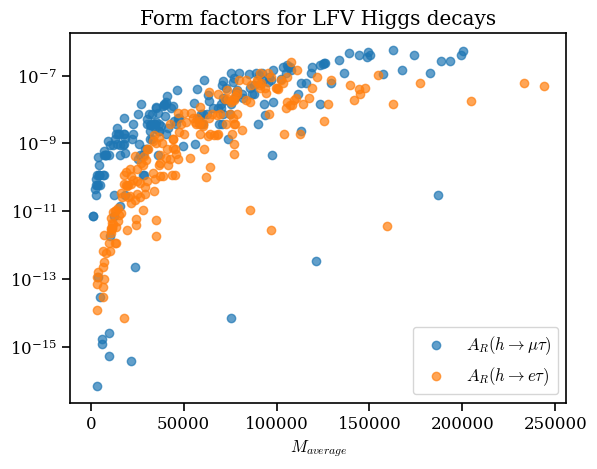

In [97]:
plt.scatter(M_average_mutau, AR_results_mutau, label=r'$A_R(h \to \mu \tau)$', alpha=0.7)
plt.scatter(M_average_etau, AR_results_etau, label=r'$A_R(h \to e \tau)$', alpha=0.7)
plt.title('Form factors for LFV Higgs decays')
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('$M_{average}$')
#plt.ylabel('$A_R$')
plt.legend()

In [16]:
from LFVXD.Hdecay_diagrams_v2 import calculate_decay_width, calculate_branching_ratio

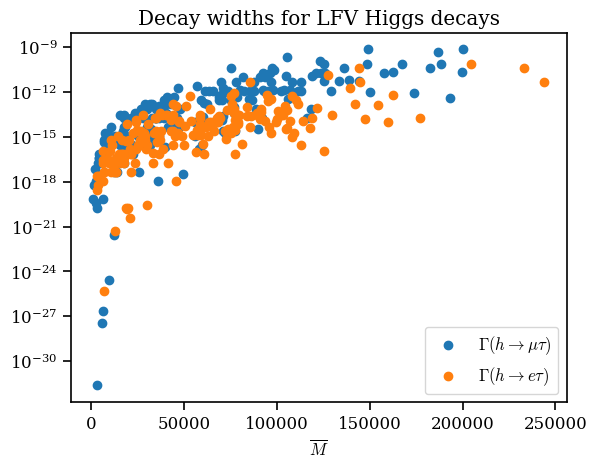

In [99]:
Hwidth_results_mutau = [
    calculate_decay_width(AL, AR, mH10_val, ml_vals[1], ml_vals[2])
    for AL, AR in zip(AL_results_mutau, AR_results_mutau)
]
Hwidth_results_etau = [
    calculate_decay_width(AL, AR, mH10_val, ml_vals[0], ml_vals[2])
    for AL, AR in zip(AL_results_etau, AR_results_etau)
]

plt.figure()
plt.scatter(M_average_mutau, Hwidth_results_mutau, label=r'$\Gamma(h \to \mu \tau)$')
plt.scatter(M_average_etau, Hwidth_results_etau, label=r'$\Gamma(h \to e \tau)$')
plt.title('Decay widths for LFV Higgs decays')
plt.xlabel(r'$\overline{M}$')
#plt.ylabel('$\Gamma$')
#plt.xscale('log')
plt.yscale('log')
plt.legend()

In [100]:
# Compute branching ratios for h → μτ
HBr_results_mutau = [
    calculate_branching_ratio(AL, AR, mH10_val, ml_vals[1], ml_vals[2])
    for AL, AR in zip(AL_results_mutau, AR_results_mutau)
]
HBr_results_etau = [
    calculate_branching_ratio(AL, AR, mH10_val, ml_vals[0], ml_vals[2])
    for AL, AR in zip(AL_results_etau, AR_results_etau)
]

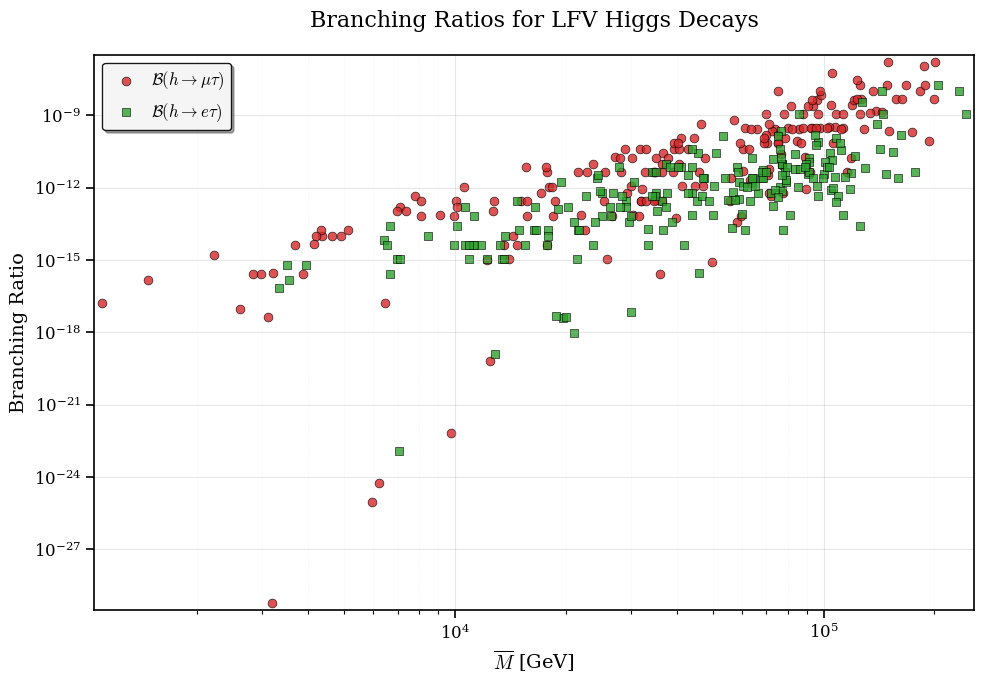

In [103]:
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'serif',
    'mathtext.fontset': 'cm',
    'axes.linewidth': 1.2,
    'xtick.major.width': 1.2,
    'ytick.major.width': 1.2,
    'xtick.minor.width': 0.8,
    'ytick.minor.width': 0.8,
    'xtick.major.size': 6,
    'ytick.major.size': 6,
    'xtick.minor.size': 3,
    'ytick.minor.size': 3,
})

fig, ax = plt.subplots(figsize=(10, 7))

scatter1 = ax.scatter(M_average_mutau, HBr_results_mutau, 
                     label=r'$\mathcal{B}(h \to \mu\tau)$', 
                     c='#d62728', marker='o', s=40, alpha=0.8, edgecolors='black', linewidth=0.5)
scatter2 = ax.scatter(M_average_etau, HBr_results_etau, 
                     label=r'$\mathcal{B}(h \to e\tau)$', 
                     c='#2ca02c', marker='s', s=40, alpha=0.8, edgecolors='black', linewidth=0.5)

ax.set_xscale('log')
ax.set_yscale('log')

ax.grid(True, which='major', linestyle='-', linewidth=0.8, alpha=0.3)
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.2)

ax.set_xlabel(r'$\overline{M}$ [GeV]', fontsize=14)
ax.set_ylabel(r'Branching Ratio', fontsize=14)
ax.set_title('Branching Ratios for LFV Higgs Decays', fontsize=16, pad=20)

legend = ax.legend(loc='best', frameon=True, fancybox=True, shadow=True, 
                   fontsize=12, ncol=1, columnspacing=1.0, handletextpad=0.5)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.9)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1.0)

ax.set_xlim(left=0.95*min(min(M_average_mutau), min(M_average_etau)), 
            right=1.05*max(max(M_average_mutau), max(M_average_etau)))
ax.set_ylim(bottom=0.5*min(min(HBr_results_mutau), min(HBr_results_etau)), 
            top=2.0*max(max(HBr_results_mutau), max(HBr_results_etau)))

ax.minorticks_on()

plt.tight_layout()
plt.savefig('images/branching_ratios_LFV_Higgs_decays_vR_100000.png', dpi=300)
plt.show()


## Degenerate cases

### Case $M_i^- \sim v_R$

In [24]:
def instance_degenerate_total_formfactors(a, b, vR_val, mu, Delta):
    """
    Calculate the total form factors for the LFV Higgs decays h -> l_a l_b, where
    l_a and l_b are leptons with indices a and b respectively, Considering the 
    case of degenerate heavy neutrinos.
    """
    mn1_val = mp.mpf('1e-12')  # GeV
    d21 = mp.mpf(str(Nudata.squareDm21.central))*mp.mpf('1e-18')  # factor to convert eV^2 to GeV^2
    d31 = mp.mpf(str(Nudata.squareDm31.central))*mp.mpf('1e-18')
    #mn1_val = 1e-12  # GeV
    #d21 = Nudata.squareDm21.central*mp.mpf('1e-18')  # factor to convert eV^2 to GeV^2
    #d31 = Nudata.squareDm31.central*mp.mpf('1e-18')
    mn2_val = mp.sqrt(mn1_val**2 + d21)
    mn3_val = mp.sqrt(mn1_val**2 + d31)
    MNp = Delta + mu
    MNm = Delta - mu
    heavy_neutrino_masses = [
        MNm, MNm, MNm,
        MNp, MNp, MNp
    ]
    mni_vals = [
        mn1_val, mn2_val, mn3_val
    ] + heavy_neutrino_masses

    #epsilon_val = k1_val/vR_val
    
    k1_val = mp.mpf('246')
    #k1_val = 246

    #mW1_val = mp.mpf('80.3692')
    #mW2_squared_val = (mW1_val**2/k1_val**2)*(k1_val**2 + vR_val**2)
    #mW2_val = mp.sqrt(mW2_squared_val)
    
    rho1_val = mp.mpf(data_scan_potential['rho1input'][6])
    alpha1_val = mp.mpf(data_scan_potential['alpha1input'][6])
    alpha2_val = mp.mpf(data_scan_potential['alpha2input'][6])
    alpha3_val = mp.mpf(data_scan_potential['alpha3input'][6])
    lambda1_val = mp.mpf(data_scan_potential['lam1input'][6])
    lambda2_val = mp.mpf(data_scan_potential['lam2input'][6])

    #rho1_val = data_scan_potential['rho1input'][6]
    #alpha1_val = data_scan_potential['alpha1input'][6]
    #alpha2_val = data_scan_potential['alpha2input'][6]
    #alpha3_val = data_scan_potential['alpha3input'][6]
    #lambda1_val = data_scan_potential['lam1input'][6]
    #lambda2_val = data_scan_potential['lam2input'][6]

    alpha13_val = alpha1_val + alpha3_val
    alpha12_val = alpha1_val + alpha2_val
    alpha23_val = alpha2_val - alpha3_val # alpha2 - alpha3 > 0
    lamb12_val = lambda1_val + lambda2_val
    mHR_squared_val = (alpha23_val)*(k1_val**2 + vR_val**2)

    mHR_val = mp.sqrt(mHR_squared_val)
    #mHR_val = np.sqrt(mHR_squared_val)


    #mH10_val = mp.mpf(data_scan_potential['mH1'][27])
    
    me_val = mp.mpf('0.00051')
    mmu_val = mp.mpf('0.105')
    mtau_val = mp.mpf('1.776')

    #me_val = 0.00051
    #mmu_val = 0.105
    #mtau_val = 1.776

    ml_vals = [
        me_val,
        mmu_val,
        mtau_val
    ]
    # average value for heavy neutrino masses
    M_average = ( mni_vals[3] + mni_vals[4] + mni_vals[5] + mni_vals[6] + mni_vals[7] + mni_vals[8]) / 6

    ff = formfactors_neutrino_sum(
        mni_vals, ml_vals, rho1_val, alpha13_val, alpha12_val,
        alpha23_val, lamb12_val, idx_a=a-1, idx_b=b-1, k1_val=k1_val,
        vR_val=vR_val, mHR_val=mHR_val, verbose=False
    )
    total_ff = total_formfactors(ff)
    total_ff['M_average'] = M_average
    return total_ff

In [25]:
vR_pow = mp.linspace(3, 5, 10)
vR_values = [mp.mpf('10')**p for p in vR_pow]

#vR_values = np.logspace(3, 5, 10)

AL_hmutau_degenerate_values_mu2 = [
    abs(instance_degenerate_total_formfactors(
        1,3, vR_val=mp.mpf(f'{vR_val}'), 
        mu=mp.mpf('1e-2'), 
        Delta=mp.mpf(f'{vR_val}')
    )['AL'])
    for vR_val in vR_values
]
AR_hmutau_degenerate_values_mu2 = [
    abs(instance_degenerate_total_formfactors(
        1,3, vR_val=mp.mpf(f'{vR_val}'), 
        mu=mp.mpf('1e-2'), 
        Delta=mp.mpf(f'{vR_val}')
    )['AR'])
    for vR_val in vR_values
]

AL_hmutau_degenerate_values_mu3 = [
    abs(instance_degenerate_total_formfactors(
        1,3, vR_val=mp.mpf(f'{vR_val}'), 
        mu=mp.mpf('1e-3'), 
        Delta=mp.mpf(f'{vR_val}')
    )['AL'])
    for vR_val in vR_values
]
AR_hmutau_degenerate_values_mu3 = [
    abs(instance_degenerate_total_formfactors(
        1,3, vR_val=mp.mpf(f'{vR_val}'), 
        mu=mp.mpf('1e-3'), 
        Delta=mp.mpf(f'{vR_val}')
    )['AR'])
    for vR_val in vR_values
]

In [ ]:
AL_hmutau_degenerate_values_mu2, AL_hmutau_degenerate_values_mu3quad

([mpf('1.4557220084561246e-11'),
  mpf('5.8237456491943415e-11'),
  mpf('3.4930169859696142e-10'),
  mpf('1.3969156939144445e-9'),
  mpf('1.2012623883927252e-13'),
  mpf('5.5879412182315781e-9'),
  mpf('3.725274820215759e-8'),
  mpf('1.1920932661134519e-7'),
  mpf('1.7881372479911344e-7'),
  mpf('2.3841807436575946e-7')],
 [mpf('5.8202324839273212e-11'),
  mpf('1.1639937629988325e-10'),
  mpf('5.8187504809856399e-10'),
  mpf('1.3967960122462937e-9'),
  mpf('9.3127461243445861e-10'),
  mpf('7.3721487251312131e-14'),
  mpf('1.4901391688186127e-8'),
  mpf('3.1443967991224744e-13'),
  mpf('1.1920915273628109e-7'),
  mpf('1.4305114391921623e-6')])

In [22]:
from LFVXD.Hdecay_diagrams_v2 import calculate_decay_width, calculate_branching_ratio

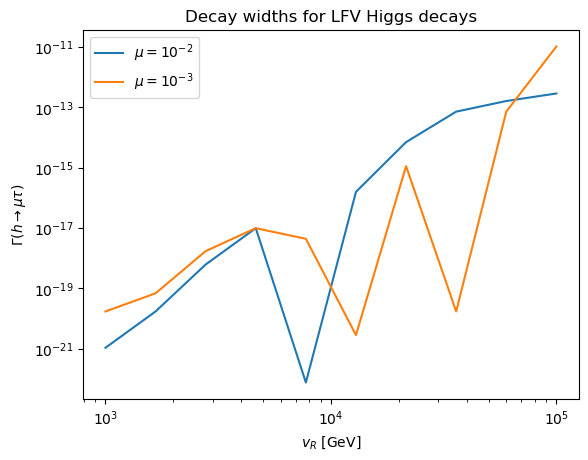

In [23]:
Hwidth_results_mutau_degenerate_mu2 = [
    calculate_decay_width(AL,AR,mH10_val, ml_vals[1], ml_vals[2])
    for AL, AR in zip(AL_hmutau_degenerate_values_mu2, AR_hmutau_degenerate_values_mu2)
]

Hwidth_results_mutau_degenerate_mu3 = [
    calculate_decay_width(AL,AR,mH10_val, ml_vals[1], ml_vals[2])
    for AL, AR in zip(AL_hmutau_degenerate_values_mu3, AR_hmutau_degenerate_values_mu3)
]

plt.figure()
plt.plot(vR_values, Hwidth_results_mutau_degenerate_mu2, label=r'$\mu = 10^{-2}$')
plt.plot(vR_values, Hwidth_results_mutau_degenerate_mu3, label=r'$\mu = 10^{-3}$')
plt.title('Decay widths for LFV Higgs decays')
plt.xlabel('$v_R$ [GeV]')
plt.ylabel(r'$\Gamma(h \to \mu \tau)$')
plt.xscale('log')
plt.yscale('log')
plt.legend()

### Case $M_i^-$ from perturvativity bound

In [48]:
def perturvativity_degenerate_total_formfactors(a, b, vR_val, data):
    """
    Calculate the total form factors for the LFV Higgs decays h -> l_a l_b, where
    l_a and l_b are leptons with indices a and b respectively, Considering the 
    case of degenerate heavy neutrinos and the perturvativity bounds.
    """
    mn1_val = mp.mpf('1e-12')  # GeV
    d21 = mp.mpf(str(Nudata.squareDm21.central))*mp.mpf('1e-18')  # factor to convert eV^2 to GeV^2
    d31 = mp.mpf(str(Nudata.squareDm31.central))*mp.mpf('1e-18')
    mn2_val = mp.sqrt(mn1_val**2 + d21)
    mn3_val = mp.sqrt(mn1_val**2 + d31)
    mn_indices = select_single_value(data)
    print(mn_indices)
    idx = mn_indices[0]
    Mnm = mn_indices[1]
    mu = data['muii'][idx]
    Mnp = Mnm + mu
    
    heavy_neutrino_masses = [
        Mnm, Mnm, Mnm,
        Mnp, Mnp, Mnp
    ]
    mni_vals = [
        mn1_val, mn2_val, mn3_val
    ] + heavy_neutrino_masses

    #epsilon_val = k1_val/vR_val
    k1_val = mp.mpf('246')
    #mW1_val = mp.mpf('80.3692')
    #mW2_squared_val = (mW1_val**2/k1_val**2)*(k1_val**2 + vR_val**2)
    #mW2_val = mp.sqrt(mW2_squared_val)
    rho1_val = mp.mpf(data_scan_potential['rho1input'][6])
    alpha1_val = mp.mpf(data_scan_potential['alpha1input'][6])
    alpha2_val = mp.mpf(data_scan_potential['alpha2input'][6])
    alpha3_val = mp.mpf(data_scan_potential['alpha3input'][6])
    lambda1_val = mp.mpf(data_scan_potential['lam1input'][6])
    lambda2_val = mp.mpf(data_scan_potential['lam2input'][6])
    alpha13_val = alpha1_val + alpha3_val
    alpha12_val = alpha1_val + alpha2_val
    alpha23_val = alpha2_val - alpha3_val # alpha2 - alpha3 > 0
    lamb12_val = lambda1_val + lambda2_val
    mHR_squared_val = (alpha23_val)*(k1_val**2 + vR_val**2)
    mHR_val = mp.sqrt(mHR_squared_val)
    #mH10_val = mp.mpf(data_scan_potential['mH1'][27])
    me_val = mp.mpf('0.00051')
    mmu_val = mp.mpf('0.105')
    mtau_val = mp.mpf('1.776')
    ml_vals = [
        me_val,
        mmu_val,
        mtau_val
    ]
    # average value for heavy neutrino masses
    M_average = ( mni_vals[3] + mni_vals[4] + mni_vals[5] + mni_vals[6] + mni_vals[7] + mni_vals[8]) / 6

    ff = formfactors_neutrino_sum(
        mni_vals, ml_vals, rho1_val, alpha13_val, alpha12_val,
        alpha23_val, lamb12_val, idx_a=a-1, idx_b=b-1, k1_val=k1_val,
        vR_val=vR_val, mHR_val=mHR_val, verbose=False
    )
    total_ff = total_formfactors(ff)
    total_ff['M_average'] = M_average
    return total_ff

In [ ]:
formfactor_results_etau = []
formfactor_results_mutau = []

vR_val = mp.mpf('100000')
for i in range(100):
    ffmutau = perturvativity_degenerate_total_formfactors(2, 3, vR_val, data_scan_perturvativity_100000)
    formfactor_results_mutau.append(ffmutau)

    ffetau = perturvativity_degenerate_total_formfactors(1, 3, vR_val, data_scan_perturvativity_100000)
    formfactor_results_etau.append(ffetau)

(0, np.float64(3099.597932406342))
(0, np.float64(14370.743701353776))
(0, np.float64(16678.894040048923))
(0, np.float64(18018.531733019823))
(0, np.float64(27112.2893098141))
(0, np.float64(27182.51575103017))
(0, np.float64(9326.816758326711))
(0, np.float64(5293.736262572978))
(0, np.float64(23573.84315909568))
(0, np.float64(27167.175561804903))
(0, np.float64(16524.112354979985))
(0, np.float64(14493.470722718635))
(0, np.float64(2432.8744231857727))
(0, np.float64(4660.309675688135))
(0, np.float64(20567.639287656184))
(0, np.float64(7662.402758247768))
(0, np.float64(29216.94525803001))
(0, np.float64(6613.938666923156))
(0, np.float64(22201.74577496179))
(0, np.float64(6938.200211345077))
(0, np.float64(4101.905993164379))
(0, np.float64(16818.967520454422))
(0, np.float64(18259.70883501445))
(0, np.float64(2012.5723128839843))
(0, np.float64(2010.9837470849725))
(0, np.float64(10279.120777206386))
(0, np.float64(5320.562140673775))
(0, np.float64(4131.047603284001))
(0, np.fl

In [50]:
M_average_mutau = [formfactor['M_average'] for formfactor in formfactor_results_mutau]
AL_results_mutau = [abs(formfactor['AL']) for formfactor in formfactor_results_mutau]
AR_results_mutau = [abs(formfactor['AR']) for formfactor in formfactor_results_mutau]
M_average_etau = [formfactor['M_average'] for formfactor in formfactor_results_etau]
AL_results_etau = [abs(formfactor['AL']) for formfactor in formfactor_results_etau]
AR_results_etau = [abs(formfactor['AR']) for formfactor in formfactor_results_etau]

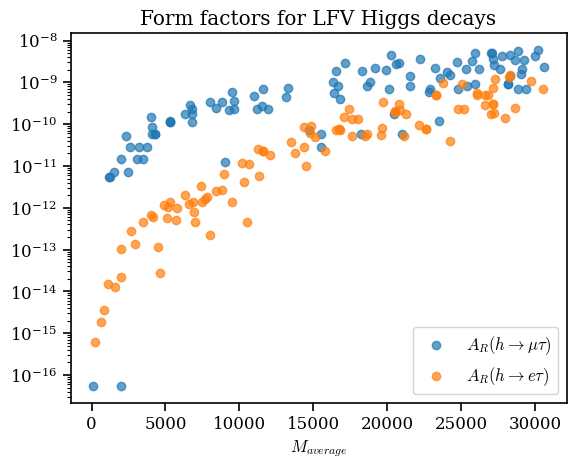

In [51]:
plt.scatter(M_average_mutau, AR_results_mutau, label=r'$A_R(h \to \mu \tau)$', alpha=0.7)
plt.scatter(M_average_etau, AR_results_etau, label=r'$A_R(h \to e \tau)$', alpha=0.7)
plt.title('Form factors for LFV Higgs decays')
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('$M_{average}$')
#plt.ylabel('$A_R$')
plt.legend()

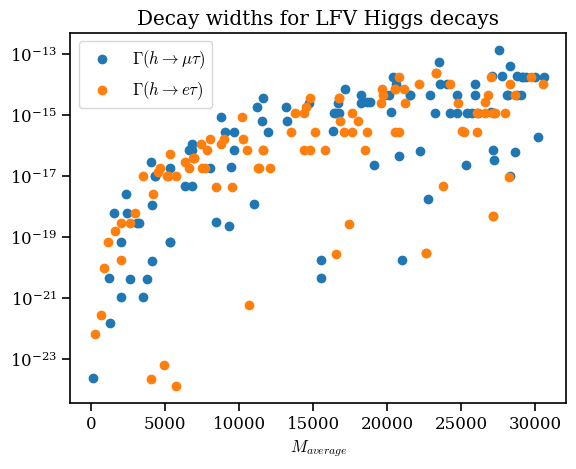

In [52]:
Hwidth_results_mutau = [
    calculate_decay_width(AL, AR, mH10_val, ml_vals[1], ml_vals[2])
    for AL, AR in zip(AL_results_mutau, AR_results_mutau)
]
Hwidth_results_etau = [
    calculate_decay_width(AL, AR, mH10_val, ml_vals[0], ml_vals[2])
    for AL, AR in zip(AL_results_etau, AR_results_etau)
]

plt.figure()
plt.scatter(M_average_mutau, Hwidth_results_mutau, label=r'$\Gamma(h \to \mu \tau)$')
plt.scatter(M_average_etau, Hwidth_results_etau, label=r'$\Gamma(h \to e \tau)$')
plt.title('Decay widths for LFV Higgs decays')
plt.xlabel('$M_{average}$')
#plt.ylabel('$\Gamma$')
#plt.xscale('log')
plt.yscale('log')
plt.legend()

In [53]:
# Compute branching ratios for h → μτ
HBr_results_mutau = [
    calculate_branching_ratio(AL, AR, mH10_val, ml_vals[1], ml_vals[2])
    for AL, AR in zip(AL_results_mutau, AR_results_mutau)
]
HBr_results_etau = [
    calculate_branching_ratio(AL, AR, mH10_val, ml_vals[0], ml_vals[2])
    for AL, AR in zip(AL_results_etau, AR_results_etau)
]

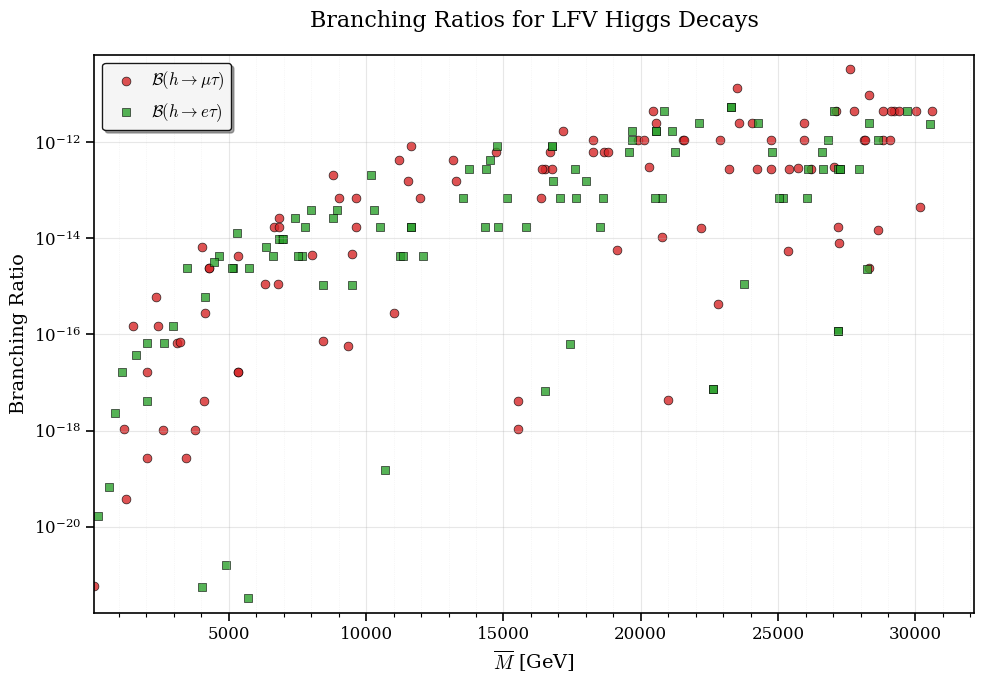

In [ ]:
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'serif',
    'mathtext.fontset': 'cm',
    'axes.linewidth': 1.2,
    'xtick.major.width': 1.2,
    'ytick.major.width': 1.2,
    'xtick.minor.width': 0.8,
    'ytick.minor.width': 0.8,
    'xtick.major.size': 6,
    'ytick.major.size': 6,
    'xtick.minor.size': 3,
    'ytick.minor.size': 3,
})

fig, ax = plt.subplots(figsize=(10, 7))

scatter1 = ax.scatter(M_average_mutau, HBr_results_mutau, 
                     label=r'$\mathcal{B}(h \to \mu\tau)$', 
                     c='#d62728', marker='o', s=40, alpha=0.8, edgecolors='black', linewidth=0.5)
scatter2 = ax.scatter(M_average_etau, HBr_results_etau, 
                     label=r'$\mathcal{B}(h \to e\tau)$', 
                     c='#2ca02c', marker='s', s=40, alpha=0.8, edgecolors='black', linewidth=0.5)

ax.set_yscale('log')

ax.grid(True, which='major', linestyle='-', linewidth=0.8, alpha=0.3)
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.2)

ax.set_xlabel(r'$\overline{M}$ [GeV]', fontsize=14)
ax.set_ylabel(r'Branching Ratio', fontsize=14)
ax.set_title('Branching Ratios for LFV Higgs Decays', fontsize=16, pad=20)

legend = ax.legend(loc='best', frameon=True, fancybox=True, shadow=True, 
                   fontsize=12, ncol=1, columnspacing=1.0, handletextpad=0.5)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.9)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1.0)

ax.set_xlim(left=0.95*min(min(M_average_mutau), min(M_average_etau)), 
            right=1.05*max(max(M_average_mutau), max(M_average_etau)))
ax.set_ylim(bottom=0.5*min(min(HBr_results_mutau), min(HBr_results_etau)), 
            top=2.0*max(max(HBr_results_mutau), max(HBr_results_etau)))

ax.minorticks_on()

plt.tight_layout()
plt.savefig('images/branching_ratios_LFV_Higgs_decays_vR_degenerate_100000.png', dpi=300)
plt.show()
